In [325]:
import os 
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
os.chdir('C:\\Users\\rhian\\Downloads\\CYPLAN 255\\AP-Exams\\Data')
os.getcwd()

'C:\\Users\\rhian\\Downloads\\CYPLAN 255\\AP-Exams\\Data'

In [171]:
ap_features = pd.read_csv('AP_Student_Features.csv')
ap_features

,ncessch,year,sex,race,leaid,students_AP_exam_none,students_AP_pass_none,students_AP_exam_oneormore,students_AP_pass_oneormore,enrollment_crdc,enrl_IB,enrl_AP,enrl_AP_science,enrl_AP_math,enrl_AP_other,enrl_AP_language,enrl_gifted_talented,students_SAT_ACT,students_chronically_absent,students_disc_harass_dis,students_disc_harass_race,students_disc_harass_sex,students_report_harass_dis,students_report_harass_race,students_report_harass_sex,students_susp_in_sch,students_susp_out_sch_single,students_susp_out_sch_multiple,expulsions_no_ed_serv,expulsions_with_ed_serv,expulsions_zero_tolerance,students_arrested,students_referred_law_enforce,transfers_alt_sch_disc,AP_oneormore_Present,AP_none_Present
0,40032402160.0000,2011,1,1,400324.0000,NaN,NaN,NaN,NaN,26.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0,0
1,40032402160.0000,2011,1,2,400324.0000,NaN,NaN,NaN,NaN,44.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0,0
2,40032402160.0000,2011,1,3,400324.0000,NaN,NaN,NaN,NaN,59.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0,0
3,40032402160.0000,2011,1,4,400324.0000,NaN,NaN,NaN,NaN,20.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0,0
4,40032402160.0000,2011,1,5,400324.0000,NaN,NaN,NaN,NaN,17.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937939,390059405085.0000,2015,99,4,3900594.0000,NaN,NaN,NaN,NaN,4.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0
937940,390059405085.0000,2015,99,5,3900594.0000,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0
937941,390059405085.0000,2015,99,6,3900594.0000,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0
937942,390059405085.0000,2015,99,7,3900594.0000,NaN,NaN,NaN,NaN,7.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0


In [172]:
# replace wrong AP enrollment 
ap_features['AP_enrl_sum'] = ap_features[['students_AP_exam_none', 'students_AP_exam_oneormore']].sum(axis=1)

for i in range(0, ap_features.shape[0]): 
    if ap_features['students_AP_exam_oneormore'][i] > ap_features['enrl_AP'][i]: 
        ap_features['enrl_AP'][i] = ap_features['AP_enrl_sum'][i]
        
for i in range(0, ap_features.shape[0]): 
    if ap_features['students_AP_exam_none'][i] > ap_features['enrl_AP'][i]: 
        ap_features['enrl_AP'][i] = ap_features['AP_enrl_sum'][i]
        
ap_features[59:65]

C:\Users\rhian\AppData\Local\Temp/ipykernel_6960/2010446172.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_features['enrl_AP'][i] = ap_features['AP_enrl_sum'][i]
C:\Users\rhian\AppData\Local\Temp/ipykernel_6960/2010446172.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_features['enrl_AP'][i] = ap_features['AP_enrl_sum'][i]


,ncessch,year,sex,race,leaid,students_AP_exam_none,students_AP_pass_none,students_AP_exam_oneormore,students_AP_pass_oneormore,enrollment_crdc,enrl_IB,enrl_AP,enrl_AP_science,enrl_AP_math,enrl_AP_other,enrl_AP_language,enrl_gifted_talented,students_SAT_ACT,students_chronically_absent,students_disc_harass_dis,students_disc_harass_race,students_disc_harass_sex,students_report_harass_dis,students_report_harass_race,students_report_harass_sex,students_susp_in_sch,students_susp_out_sch_single,students_susp_out_sch_multiple,expulsions_no_ed_serv,expulsions_with_ed_serv,expulsions_zero_tolerance,students_arrested,students_referred_law_enforce,transfers_alt_sch_disc,AP_oneormore_Present,AP_none_Present,AP_enrl_sum
59,60000103278.0000,2011,2,4,600001.0000,0.0000,NaN,4.0000,NaN,2.0000,0.0000,4.0000,0.0000,2.0000,2.0000,2.0000,NaN,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,1,1,4.0000
60,60000103278.0000,2011,2,5,600001.0000,0.0000,NaN,0.0000,NaN,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,1,1,0.0000
61,60000103278.0000,2011,2,6,600001.0000,0.0000,NaN,0.0000,NaN,2.0000,0.0000,2.0000,2.0000,0.0000,2.0000,0.0000,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,1,1,0.0000
62,60000103278.0000,2011,2,7,600001.0000,0.0000,NaN,0.0000,NaN,8.0000,0.0000,2.0000,0.0000,0.0000,2.0000,0.0000,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,1,1,0.0000
63,60000103278.0000,2011,2,99,600001.0000,49.0000,4.0000,22.0000,15.0000,245.0000,0.0000,73.0000,27.0000,7.0000,22.0000,9.0000,NaN,15.0000,24.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,10.0000,7.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,1,1,71.0000
64,60000103278.0000,2011,99,1,600001.0000,82.0000,8.0000,30.0000,22.0000,337.0000,0.0000,103.0000,34.0000,10.0000,19.0000,4.0000,NaN,16.0000,34.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,24.0000,16.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,1,1,112.0000


In [173]:
# replace wrong enrollment with all other columns 
ap_features['enrl_sum'] = ap_features[['enrl_IB', 'enrl_AP', 'students_chronically_absent', 'students_disc_harass_dis', 
                                       'students_disc_harass_race', 'students_disc_harass_sex', 'students_report_harass_dis',
                                       'students_report_harass_race', 'students_report_harass_sex', 'students_susp_in_sch',
                                       'students_susp_out_sch_single', 'students_susp_out_sch_multiple', 
                                       'expulsions_no_ed_serv', 'expulsions_with_ed_serv', 'expulsions_zero_tolerance', 
                                       'students_arrested', 'students_referred_law_enforce', 'transfers_alt_sch_disc']].sum(axis=1)


for i in range(0, ap_features.shape[0]): 
    if ap_features['enrl_IB'][i] > ap_features['enrollment_crdc'][i]: 
        ap_features['enrollment_crdc'][i] = ap_features['enrl_sum'][i]
        
for i in range(0, ap_features.shape[0]): 
    if ap_features['enrl_AP'][i] > ap_features['enrollment_crdc'][i]: 
        ap_features['enrollment_crdc'][i] = ap_features['enrl_sum'][i]
        
for i in range(0, ap_features.shape[0]): 
    if ap_features['students_chronically_absent'][i] > ap_features['enrollment_crdc'][i]: 
        ap_features['enrollment_crdc'][i] = ap_features['enrl_sum'][i]

for i in range(0, ap_features.shape[0]): 
    if ap_features['students_disc_harass_dis'][i] > ap_features['enrollment_crdc'][i]: 
        ap_features['enrollment_crdc'][i] = ap_features['enrl_sum'][i]

for i in range(0, ap_features.shape[0]): 
    if ap_features['students_disc_harass_race'][i] > ap_features['enrollment_crdc'][i]: 
        ap_features['enrollment_crdc'][i] = ap_features['enrl_sum'][i]

for i in range(0, ap_features.shape[0]): 
    if ap_features['students_disc_harass_sex'][i] > ap_features['enrollment_crdc'][i]: 
        ap_features['enrollment_crdc'][i] = ap_features['enrl_sum'][i]

for i in range(0, ap_features.shape[0]): 
    if ap_features['students_report_harass_dis'][i] > ap_features['enrollment_crdc'][i]: 
        ap_features['enrollment_crdc'][i] = ap_features['enrl_sum'][i]

for i in range(0, ap_features.shape[0]): 
    if ap_features['students_report_harass_race'][i] > ap_features['enrollment_crdc'][i]: 
        ap_features['enrollment_crdc'][i] = ap_features['enrl_sum'][i]

for i in range(0, ap_features.shape[0]): 
    if ap_features['students_disc_harass_sex'][i] > ap_features['enrollment_crdc'][i]: 
        ap_features['enrollment_crdc'][i] = ap_features['enrl_sum'][i]

for i in range(0, ap_features.shape[0]): 
    if ap_features['students_susp_in_sch'][i] > ap_features['enrollment_crdc'][i]: 
        ap_features['enrollment_crdc'][i] = ap_features['enrl_sum'][i]

for i in range(0, ap_features.shape[0]): 
    if ap_features['students_susp_out_sch_single'][i] > ap_features['enrollment_crdc'][i]: 
        ap_features['enrollment_crdc'][i] = ap_features['enrl_sum'][i]

for i in range(0, ap_features.shape[0]): 
    if ap_features['students_susp_out_sch_multiple'][i] > ap_features['enrollment_crdc'][i]: 
        ap_features['enrollment_crdc'][i] = ap_features['enrl_sum'][i]

for i in range(0, ap_features.shape[0]): 
    if ap_features['expulsions_no_ed_serv'][i] > ap_features['enrollment_crdc'][i]: 
        ap_features['enrollment_crdc'][i] = ap_features['enrl_sum'][i]

for i in range(0, ap_features.shape[0]): 
    if ap_features['expulsions_zero_tolerance'][i] > ap_features['enrollment_crdc'][i]: 
        ap_features['enrollment_crdc'][i] = ap_features['enrl_sum'][i]

for i in range(0, ap_features.shape[0]): 
    if ap_features['students_arrested'][i] > ap_features['enrollment_crdc'][i]: 
        ap_features['enrollment_crdc'][i] = ap_features['enrl_sum'][i] 

for i in range(0, ap_features.shape[0]): 
    if ap_features['students_referred_law_enforce'][i] > ap_features['enrollment_crdc'][i]: 
        ap_features['enrollment_crdc'][i] = ap_features['enrl_sum'][i] 
        
for i in range(0, ap_features.shape[0]): 
    if ap_features['transfers_alt_sch_disc'][i] > ap_features['enrollment_crdc'][i]: 
        ap_features['enrollment_crdc'][i] = ap_features['enrl_sum'][i] 


C:\Users\rhian\AppData\Local\Temp/ipykernel_6960/265833366.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_features['enrollment_crdc'][i] = ap_features['enrl_sum'][i]
C:\Users\rhian\AppData\Local\Temp/ipykernel_6960/265833366.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_features['enrollment_crdc'][i] = ap_features['enrl_sum'][i]
C:\Users\rhian\AppData\Local\Temp/ipykernel_6960/265833366.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [180]:
ap_features.columns

Index(['ncessch', 'year', 'sex', 'race', 'leaid', 'students_AP_exam_none',
       'students_AP_pass_none', 'students_AP_exam_oneormore',
       'students_AP_pass_oneormore', 'enrollment_crdc', 'enrl_IB', 'enrl_AP',
       'enrl_AP_science', 'enrl_AP_math', 'enrl_AP_other', 'enrl_AP_language',
       'enrl_gifted_talented', 'students_SAT_ACT',
       'students_chronically_absent', 'students_disc_harass_dis',
       'students_disc_harass_race', 'students_disc_harass_sex',
       'students_report_harass_dis', 'students_report_harass_race',
       'students_report_harass_sex', 'students_susp_in_sch',
       'students_susp_out_sch_single', 'students_susp_out_sch_multiple',
       'expulsions_no_ed_serv', 'expulsions_with_ed_serv',
       'expulsions_zero_tolerance', 'students_arrested',
       'students_referred_law_enforce', 'transfers_alt_sch_disc',
       'AP_oneormore_Present', 'AP_none_Present', 'AP_enrl_sum', 'enrl_sum',
       'AP_oneormore_AP_rate', 'AP_onemore_rate_logged',
       

In [ ]:
ap_features['enrl_sum'] = ap_features[['enrl_IB', 'enrl_AP', 'students_chronically_absent', 'students_disc_harass_dis', 
                                       'students_disc_harass_race', 'students_disc_harass_sex', 'students_report_harass_dis',
                                       'students_report_harass_race', 'students_report_harass_sex', 'students_susp_in_sch',
                                       'students_susp_out_sch_single', 'students_susp_out_sch_multiple', 
                                       'expulsions_no_ed_serv', 'expulsions_with_ed_serv', 'expulsions_zero_tolerance', 
                                       'students_arrested', 'students_referred_law_enforce', 'transfers_alt_sch_disc']].sum(axis=1)


In [174]:
### make rates 
ap_features['AP_oneormore_AP_rate'] = ap_features['students_AP_exam_oneormore'] / ap_features['enrl_AP']
ap_features['AP_onemore_rate_logged'] = np.log(ap_features['AP_oneormore_AP_rate'])
ap_features['AP_onemore_rate_squared'] = ap_features['AP_oneormore_AP_rate']**2

C:\Users\rhian\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [260]:
ap_rates = ap_features.copy()
ap_rates[['students_AP_exam_none', 'students_AP_pass_none',
       'students_AP_exam_oneormore', 'students_AP_pass_oneormore', 'enrl_IB',
       'enrl_AP', 'enrl_AP_science', 'enrl_AP_math', 'enrl_AP_other',
       'enrl_AP_language', 'enrl_gifted_talented', 'students_SAT_ACT',
       'students_chronically_absent', 'students_disc_harass_dis',
       'students_disc_harass_race', 'students_disc_harass_sex',
       'students_report_harass_dis', 'students_report_harass_race',
       'students_report_harass_sex', 'students_susp_in_sch',
       'students_susp_out_sch_single', 'students_susp_out_sch_multiple',
       'expulsions_no_ed_serv', 'expulsions_with_ed_serv',
       'expulsions_zero_tolerance', 'students_arrested',
       'students_referred_law_enforce', 'transfers_alt_sch_disc']] = \
ap_features[['students_AP_exam_none', 'students_AP_pass_none',
       'students_AP_exam_oneormore', 'students_AP_pass_oneormore', 'enrl_IB',
       'enrl_AP', 'enrl_AP_science', 'enrl_AP_math', 'enrl_AP_other',
       'enrl_AP_language', 'enrl_gifted_talented', 'students_SAT_ACT',
       'students_chronically_absent', 'students_disc_harass_dis',
       'students_disc_harass_race', 'students_disc_harass_sex',
       'students_report_harass_dis', 'students_report_harass_race',
       'students_report_harass_sex', 'students_susp_in_sch',
       'students_susp_out_sch_single', 'students_susp_out_sch_multiple',
       'expulsions_no_ed_serv', 'expulsions_with_ed_serv',
       'expulsions_zero_tolerance', 'students_arrested',
       'students_referred_law_enforce', 'transfers_alt_sch_disc']].div(ap_features.enrollment_crdc, axis=0)

ap_rates[ap_rates['students_AP_exam_oneormore'] > 0]

,ncessch,year,sex,race,leaid,students_AP_exam_none,students_AP_pass_none,students_AP_exam_oneormore,students_AP_pass_oneormore,enrollment_crdc,enrl_IB,enrl_AP,enrl_AP_science,enrl_AP_math,enrl_AP_other,enrl_AP_language,enrl_gifted_talented,students_SAT_ACT,students_chronically_absent,students_disc_harass_dis,students_disc_harass_race,students_disc_harass_sex,students_report_harass_dis,students_report_harass_race,students_report_harass_sex,students_susp_in_sch,students_susp_out_sch_single,students_susp_out_sch_multiple,expulsions_no_ed_serv,expulsions_with_ed_serv,expulsions_zero_tolerance,students_arrested,students_referred_law_enforce,transfers_alt_sch_disc,AP_oneormore_Present,AP_none_Present,AP_enrl_sum,enrl_sum,AP_oneormore_AP_rate,AP_onemore_rate_logged,AP_onemore_rate_squared
48,60000103278.0000,2011,1,1,600001.0000,0.2159,0.0227,0.0909,0.0625,176.0000,0.0000,0.2670,0.0625,0.0284,0.0455,0.0114,NaN,0.0455,0.0795,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1080,0.0625,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,1,1,54.0000,91.0000,0.3404,-1.0776,0.1159
50,60000103278.0000,2011,1,3,600001.0000,0.0260,NaN,0.0519,NaN,77.0000,0.0000,0.1039,0.0260,0.0000,0.0260,0.0260,NaN,0.0260,0.0260,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1039,0.0649,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,1,1,6.0000,23.0000,0.5000,-0.6931,0.2500
55,60000103278.0000,2011,1,99,600001.0000,0.1498,0.0150,0.0749,0.0412,267.0000,0.0000,0.2210,0.0562,0.0187,0.0449,0.0150,NaN,0.0375,0.0674,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1086,0.0599,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,1,1,60.0000,122.0000,0.3390,-1.0818,0.1149
56,60000103278.0000,2011,2,1,600001.0000,0.2733,0.0248,0.0870,0.0683,161.0000,0.0000,0.3478,0.1429,0.0311,0.0683,0.0124,NaN,0.0497,0.1242,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0311,0.0311,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,1,1,58.0000,86.0000,0.2500,-1.3863,0.0625
58,60000103278.0000,2011,2,3,600001.0000,0.0735,NaN,0.0588,0.0147,68.0000,0.0000,0.1618,0.0294,0.0000,0.0735,0.0735,NaN,0.0735,0.0294,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0735,0.0294,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,1,1,9.0000,20.0000,0.3636,-1.0116,0.1322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937711,69113710339.0000,2017,1,99,691137.0000,0.0000,NaN,0.0435,NaN,23.0000,NaN,0.0435,NaN,0.0435,NaN,NaN,NaN,0.3043,0.1739,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0435,0.0000,0.0435,0.0435,0.0000,0.0435,0.0000,1,1,1.0000,9.0000,1.0000,0.0000,1.0000
937712,69113710339.0000,2017,2,1,691137.0000,0.0000,NaN,0.0769,NaN,13.0000,NaN,0.0769,NaN,0.0769,NaN,NaN,NaN,0.2308,0.3846,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1538,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1,1,1.0000,8.0000,1.0000,0.0000,1.0000
937719,69113710339.0000,2017,2,99,691137.0000,0.0000,NaN,0.0556,NaN,18.0000,NaN,0.0556,NaN,0.0556,NaN,NaN,NaN,0.2222,0.3889,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1111,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1,1,1.0000,10.0000,1.0000,0.0000,1.0000
937720,69113710339.0000,2017,99,1,691137.0000,0.0000,NaN,0.0690,NaN,29.0000,NaN,0.0690,NaN,0.0690,NaN,NaN,NaN,0.3103,0.2414,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0690,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1,1,2.0000,11.0000,1.0000,0.0000,1.0000


In [251]:
# replace infs with nan 
ap_rates = ap_rates.replace([np.inf], np.nan)

# see if there are any more infs 
ap_rates[(ap_rates == np.inf).any(axis=1)] 

,ncessch,year,sex,race,leaid,students_AP_exam_none,students_AP_pass_none,students_AP_exam_oneormore,students_AP_pass_oneormore,enrollment_crdc,enrl_IB,enrl_AP,enrl_AP_science,enrl_AP_math,enrl_AP_other,enrl_AP_language,enrl_gifted_talented,students_SAT_ACT,students_chronically_absent,students_disc_harass_dis,students_disc_harass_race,students_disc_harass_sex,students_report_harass_dis,students_report_harass_race,students_report_harass_sex,students_susp_in_sch,students_susp_out_sch_single,students_susp_out_sch_multiple,expulsions_no_ed_serv,expulsions_with_ed_serv,expulsions_zero_tolerance,students_arrested,students_referred_law_enforce,transfers_alt_sch_disc,AP_oneormore_Present,AP_none_Present,AP_enrl_sum,enrl_sum,AP_oneormore_AP_rate,AP_onemore_rate_logged,AP_onemore_rate_squared


# Investigate availability bias 

### Does correlation drop all rows with NaN? --NO 

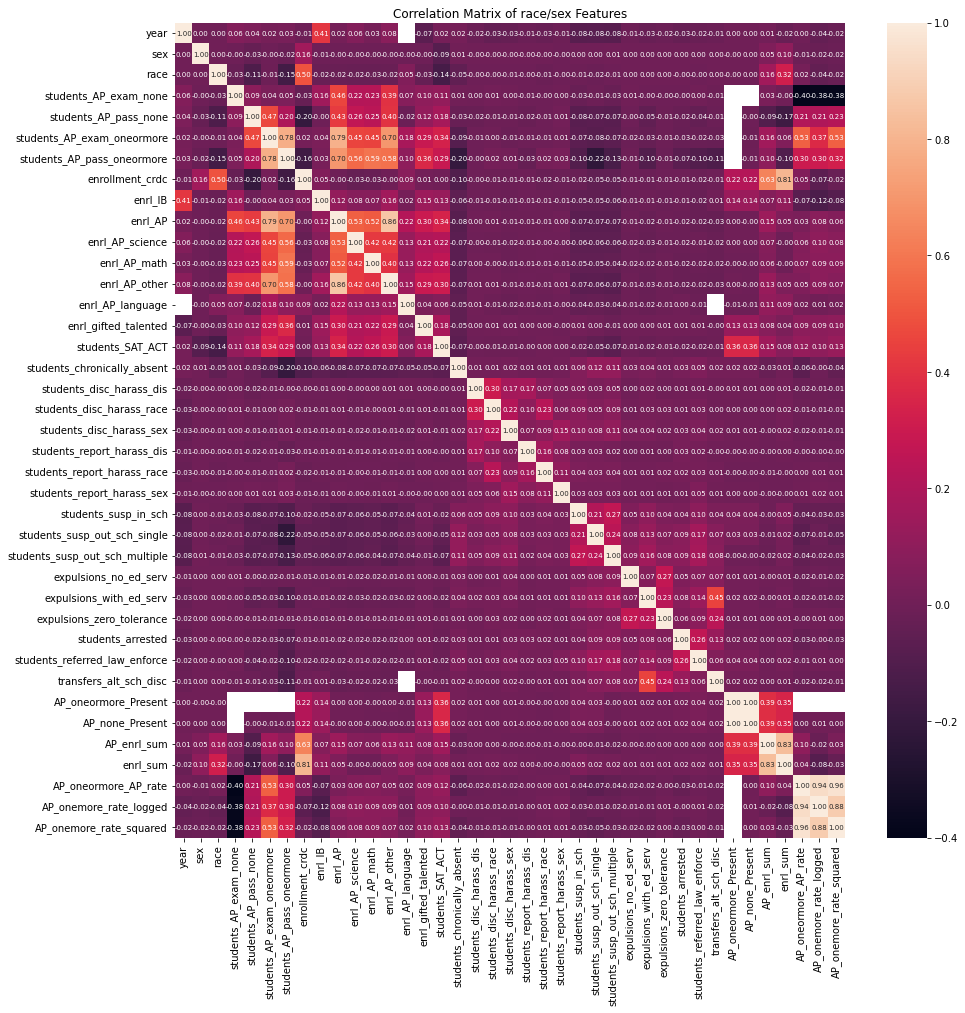

In [184]:
fig, ax = plt.subplots(figsize=(15,15)) 
correlation_mat = ap_rates.drop(['ncessch', 'leaid'], axis=1).corr()
sns.heatmap(correlation_mat, annot = True, ax=ax, annot_kws={"fontsize":7}, fmt='.2f')
plt.title("Correlation Matrix of race/sex Features") 
plt.show()

Schools who reported their AP taken data are more likely to: 
- higher rates of SAT_ACT student particpation 
- larger school enrollment / population 
- higher rates of gifted talented enrollment 
- higher rates of IB program enrollment 

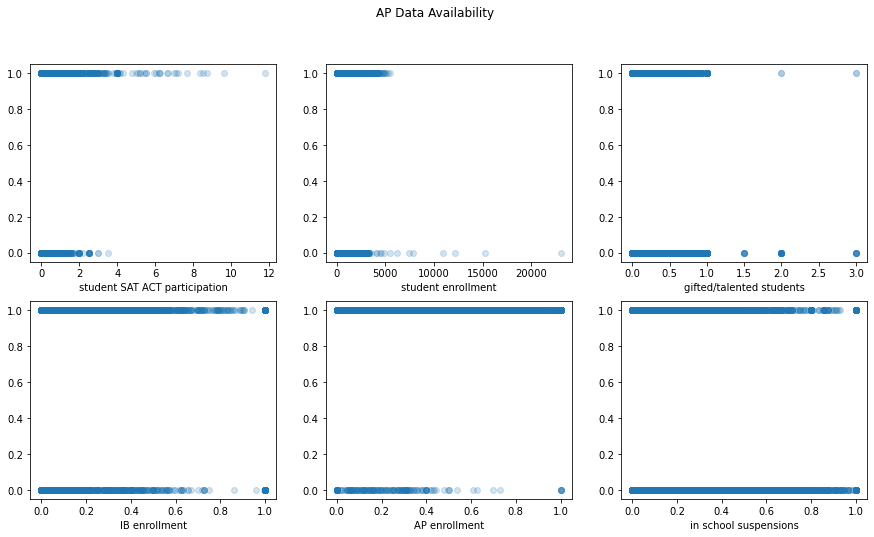

In [185]:
fig,ax = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle("AP Data Availability")

ax[0,0].scatter(ap_rates['students_SAT_ACT'], ap_rates['AP_oneormore_Present'], alpha=0.2)
ax[0,0].set_xlabel("student SAT ACT participation")

ax[0,1].scatter(ap_rates['enrollment_crdc'], ap_rates['AP_oneormore_Present'], alpha=0.2)
ax[0,1].set_xlabel("student enrollment")

ax[0,2].scatter(ap_rates['enrl_gifted_talented'], ap_rates['AP_oneormore_Present'], alpha=0.2)
ax[0,2].set_xlabel("gifted/talented students")

ax[1,0].scatter(ap_rates['enrl_IB'], ap_rates['AP_oneormore_Present'], alpha=0.2)
ax[1,0].set_xlabel("IB enrollment")

ax[1,1].scatter(ap_rates['enrl_AP'], ap_rates['AP_oneormore_Present'], alpha=0.2)
ax[1,1].set_xlabel("AP enrollment")

ax[1,2].scatter(ap_rates['students_susp_in_sch'], ap_rates['AP_oneormore_Present'], alpha=0.2)
ax[1,2].set_xlabel("in school suspensions");


# Condense df columns according to available AP data 

In [351]:
ap_rates_full = ap_rates[ap_rates['students_AP_exam_oneormore'].notna()]
ap_rates_full = ap_rates_full.drop(['AP_oneormore_Present', 'AP_none_Present', 'AP_enrl_sum', 'enrl_sum', 
                                   'students_AP_pass_none', 'students_AP_pass_oneormore'], axis=1)
ap_rates_full

,ncessch,year,sex,race,leaid,students_AP_exam_none,students_AP_exam_oneormore,enrollment_crdc,enrl_IB,enrl_AP,enrl_AP_science,enrl_AP_math,enrl_AP_other,enrl_AP_language,enrl_gifted_talented,students_SAT_ACT,students_chronically_absent,students_disc_harass_dis,students_disc_harass_race,students_disc_harass_sex,students_report_harass_dis,students_report_harass_race,students_report_harass_sex,students_susp_in_sch,students_susp_out_sch_single,students_susp_out_sch_multiple,expulsions_no_ed_serv,expulsions_with_ed_serv,expulsions_zero_tolerance,students_arrested,students_referred_law_enforce,transfers_alt_sch_disc,AP_oneormore_AP_rate,AP_onemore_rate_logged,AP_onemore_rate_squared
48,60000103278.0000,2011,1,1,600001.0000,0.2159,0.0909,176.0000,0.0000,0.2670,0.0625,0.0284,0.0455,0.0114,NaN,0.0455,0.0795,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1080,0.0625,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0.3404,-1.0776,0.1159
49,60000103278.0000,2011,1,2,600001.0000,0.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,NaN,NaN,NaN
50,60000103278.0000,2011,1,3,600001.0000,0.0260,0.0519,77.0000,0.0000,0.1039,0.0260,0.0000,0.0260,0.0260,NaN,0.0260,0.0260,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1039,0.0649,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0.5000,-0.6931,0.2500
51,60000103278.0000,2011,1,4,600001.0000,0.0000,0.0000,5.0000,0.0000,0.4000,0.4000,0.0000,0.0000,0.0000,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0.0000,-inf,0.0000
52,60000103278.0000,2011,1,5,600001.0000,0.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937720,69113710339.0000,2017,99,1,691137.0000,0.0000,0.0690,29.0000,NaN,0.0690,NaN,0.0690,NaN,NaN,NaN,0.3103,0.2414,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0690,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000
937722,69113710339.0000,2017,99,3,691137.0000,0.0000,0.0000,7.0000,NaN,0.0000,NaN,0.0000,NaN,NaN,NaN,0.1429,0.2857,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1429,0.0000,0.1429,0.1429,0.0000,0.1429,0.0000,NaN,NaN,NaN
937724,69113710339.0000,2017,99,5,691137.0000,0.0000,0.0000,1.0000,NaN,0.0000,NaN,0.0000,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,NaN,NaN
937726,69113710339.0000,2017,99,7,691137.0000,0.0000,0.0000,4.0000,NaN,0.0000,NaN,0.0000,NaN,NaN,NaN,0.2500,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,NaN,NaN


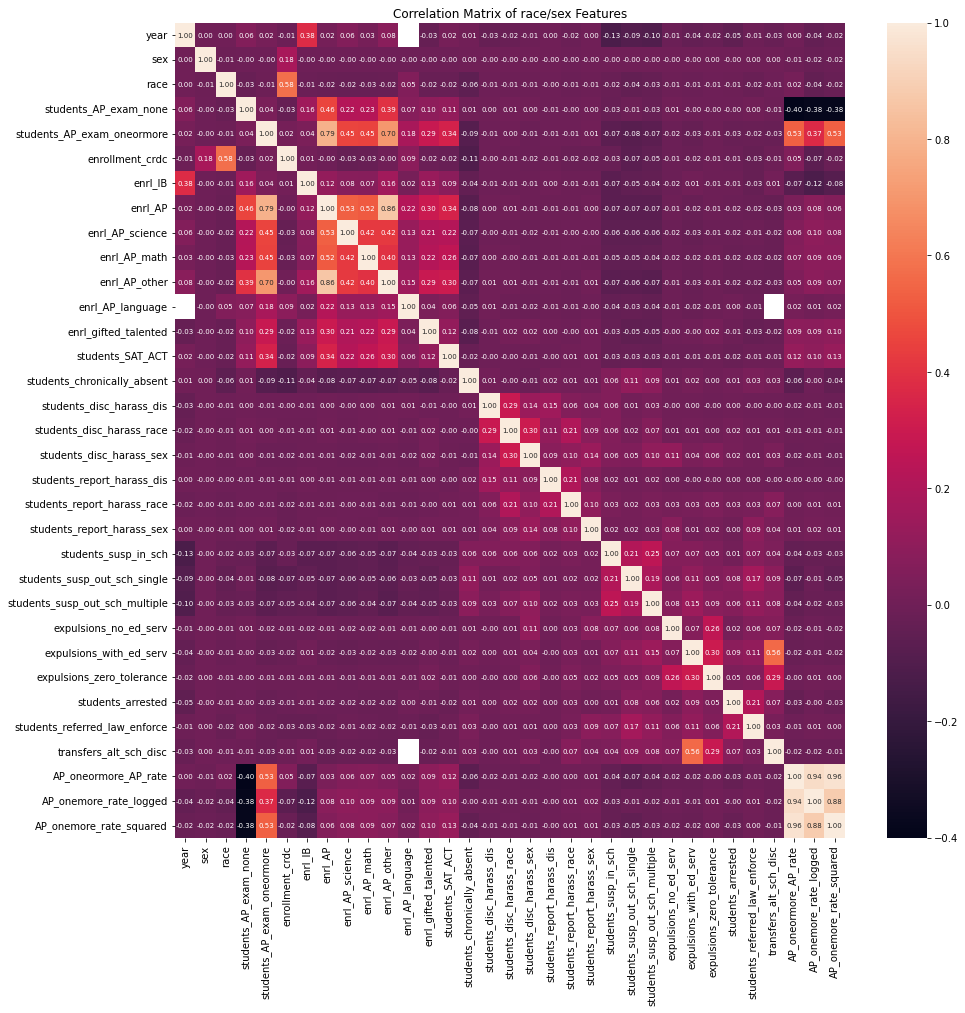

In [194]:
fig, ax = plt.subplots(figsize=(15,15)) 
correlation_mat = ap_rates_full.drop(['ncessch', 'leaid'], axis=1).corr()
sns.heatmap(correlation_mat, annot = True, ax=ax, annot_kws={"fontsize":7}, fmt='.2f')
plt.title("Correlation Matrix of race/sex Features") 
plt.show()

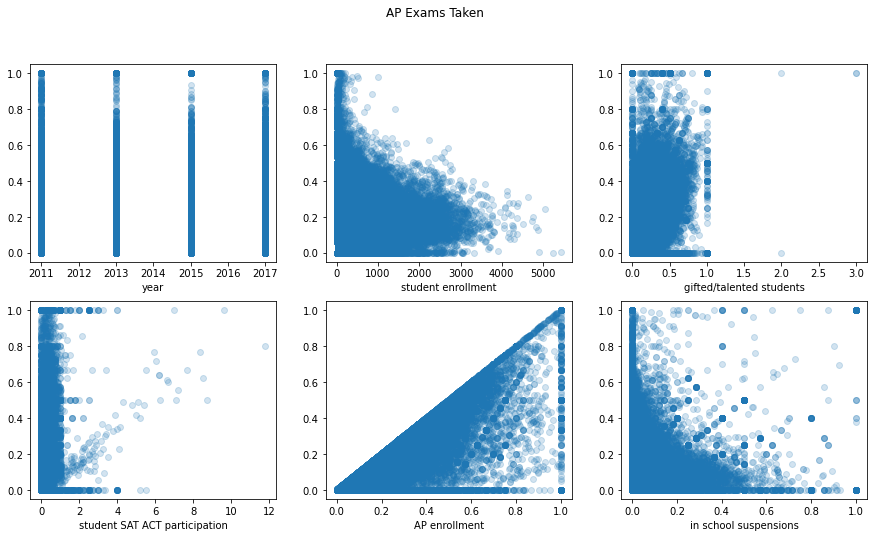

In [288]:
fig,ax = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle("AP Exams Taken")

ax[0,0].scatter(ap_rates_full['year'], ap_rates_full['students_AP_exam_oneormore'], alpha=0.2)
ax[0,0].set_xlabel("year")

ax[0,1].scatter(ap_rates_full['enrollment_crdc'], ap_rates_full['students_AP_exam_oneormore'], alpha=0.2)
ax[0,1].set_xlabel("student enrollment")

ax[0,2].scatter(ap_rates_full['enrl_gifted_talented'], ap_rates_full['students_AP_exam_oneormore'], alpha=0.2)
ax[0,2].set_xlabel("gifted/talented students")

ax[1,0].scatter(ap_rates_full['students_SAT_ACT'], ap_rates_full['students_AP_exam_oneormore'], alpha=0.2)
ax[1,0].set_xlabel("student SAT ACT participation")

ax[1,1].scatter(ap_rates_full['enrl_AP'], ap_rates_full['students_AP_exam_oneormore'], alpha=0.2)
ax[1,1].set_xlabel("AP enrollment")

ax[1,2].scatter(ap_rates_full['students_susp_in_sch'], ap_rates_full['students_AP_exam_oneormore'], alpha=0.2)
ax[1,2].set_xlabel("in school suspensions");


In [36]:
# condense our df 
# ap_feat = ap_features[['ncessch', 'leaid', 
#                        'year', 'race', 'sex', 'students_AP_exam_none', 
#                        'students_AP_exam_oneormore', 
#                        'enrl_AP', 'enrl_AP_science', 'enrl_AP_math', 'enrl_AP_other',
#                        'enrl_gifted_talented',
#                        'students_chronically_absent', 
#                        'students_susp_out_sch_single', 
#                        'students_referred_law_enforce', 'enrollment_crdc', 
#                        'students_report_harass_sex',
#                        'students_SAT_ACT', 'AP_oneormore_Present', 'AP_none_Present']] 
# ap_feat 

,ncessch,leaid,year,race,sex,students_AP_exam_none,students_AP_exam_oneormore,enrl_AP,enrl_AP_science,enrl_AP_math,enrl_AP_other,enrl_gifted_talented,students_chronically_absent,students_susp_out_sch_single,students_referred_law_enforce,enrollment_crdc,students_report_harass_sex,students_SAT_ACT,AP_oneormore_Present,AP_none_Present
0,4.003240e+10,400324.0,2011,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,26.0,0.0,0.0,0,0
1,4.003240e+10,400324.0,2011,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,26.0,0.0,0.0,0,0
2,4.003240e+10,400324.0,2011,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,26.0,0.0,0.0,0,0
3,4.003240e+10,400324.0,2011,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,44.0,0.0,0.0,0,0
4,4.003240e+10,400324.0,2011,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,44.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6433626,6.057301e+10,605730.0,2017,7,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,5.0,0.0,0.0,0,0
6433627,6.057301e+10,605730.0,2017,99,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,58.0,0.0,0.0,0,0
6433628,6.057301e+10,605730.0,2017,99,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,58.0,0.0,0.0,0,0
6433629,6.057301e+10,605730.0,2017,99,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,58.0,0.0,0.0,0,0


# Impute missing values 

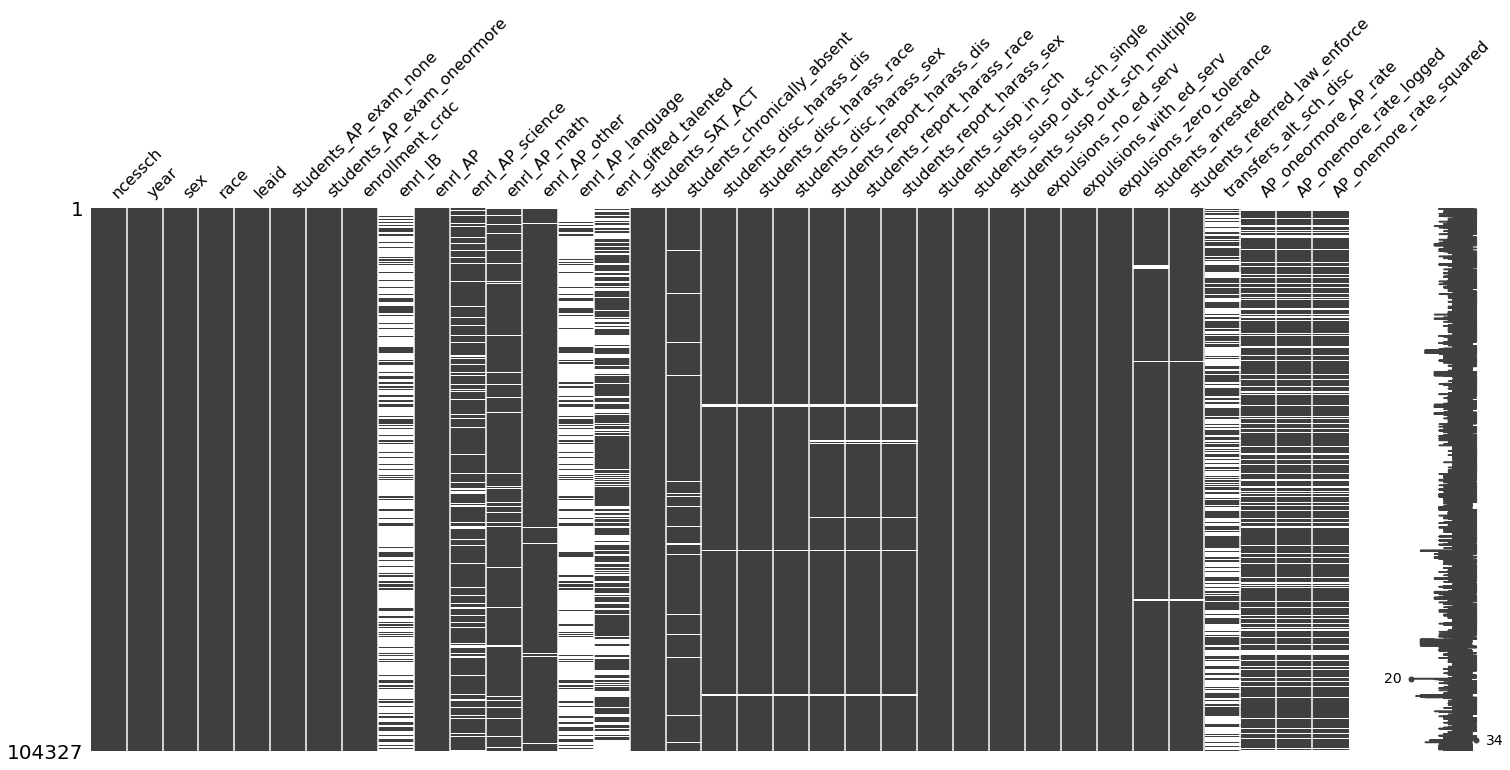

In [195]:
msno.matrix(ap_rates_full);

## DROPPING ALL COLUMNS THAT HAVE LESS THAN 50% OF DATA 

In [352]:
1 - ap_rates_full.isna().sum() / 103773

ncessch                          1.0000
year                             1.0000
sex                              1.0000
race                             1.0000
leaid                            1.0000
students_AP_exam_none            0.9998
students_AP_exam_oneormore       1.0000
enrollment_crdc                  1.0000
enrl_IB                          0.2979
enrl_AP                          0.9995
enrl_AP_science                  0.8590
enrl_AP_math                     0.9297
enrl_AP_other                    0.9830
enrl_AP_language                 0.2418
enrl_gifted_talented             0.6523
students_SAT_ACT                 0.9989
students_chronically_absent      0.9650
students_disc_harass_dis         0.9881
students_disc_harass_race        0.9873
students_disc_harass_sex         0.9871
students_report_harass_dis       0.9821
students_report_harass_race      0.9821
students_report_harass_sex       0.9821
students_susp_in_sch             0.9970
students_susp_out_sch_single     1.0000


In [358]:
ap_rates_full = ap_rates_full.reset_index(drop=True)
ap_rates_full = ap_rates_full.drop(['enrl_IB', 'enrl_AP_language', 'transfers_alt_sch_disc'], axis=1) 

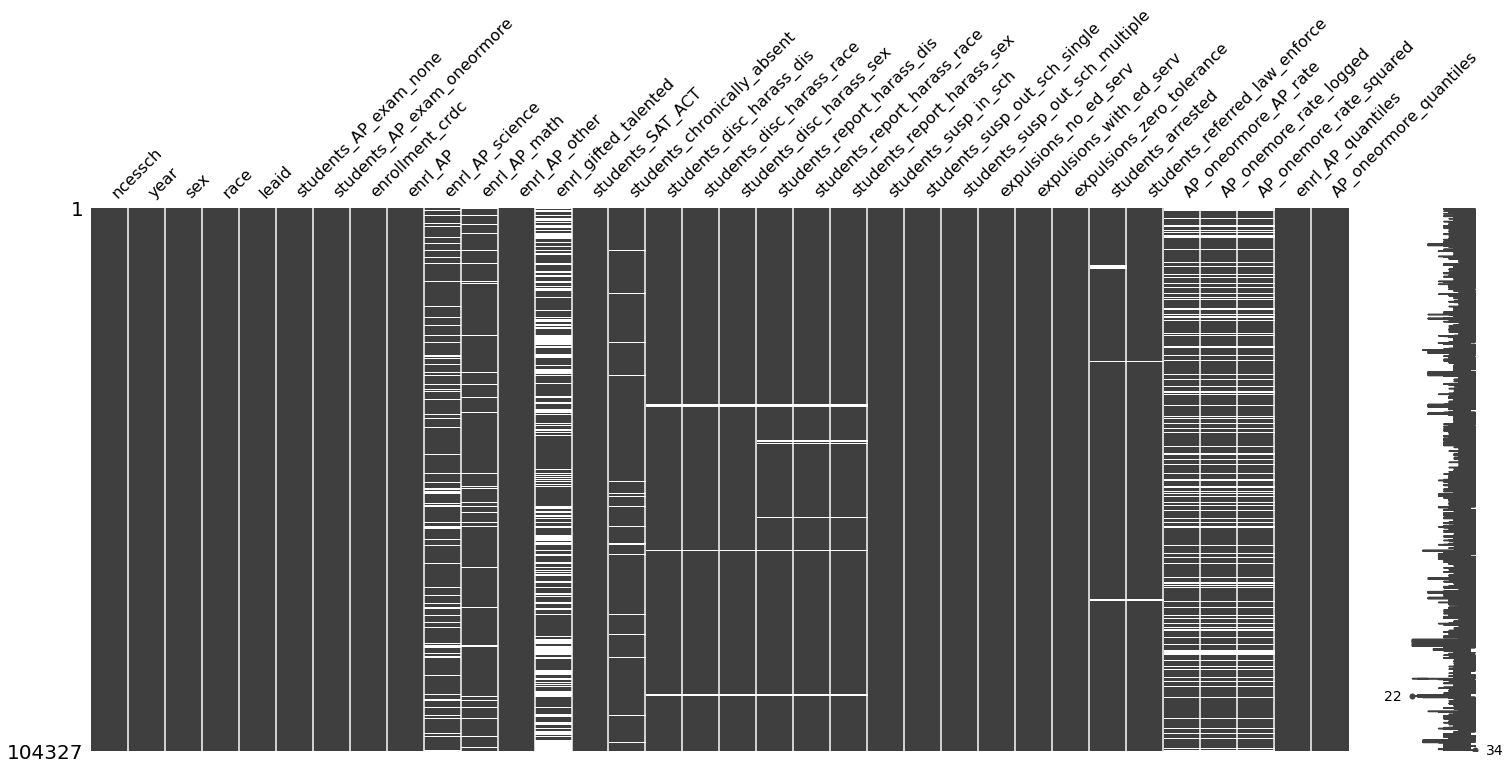

In [285]:
msno.matrix(ap_rates_full);

In [359]:
ap_rates_full.isna().sum()

ncessch                               0
year                                  0
sex                                   0
race                                  0
leaid                                 0
students_AP_exam_none                16
students_AP_exam_oneormore            0
enrollment_crdc                       0
enrl_AP                              48
enrl_AP_science                   14633
enrl_AP_math                       7297
enrl_AP_other                      1768
enrl_gifted_talented              36086
students_SAT_ACT                    112
students_chronically_absent        3636
students_disc_harass_dis           1236
students_disc_harass_race          1323
students_disc_harass_sex           1334
students_report_harass_dis         1859
students_report_harass_race        1859
students_report_harass_sex         1859
students_susp_in_sch                310
students_susp_out_sch_single          0
students_susp_out_sch_multiple        0
expulsions_no_ed_serv                 0


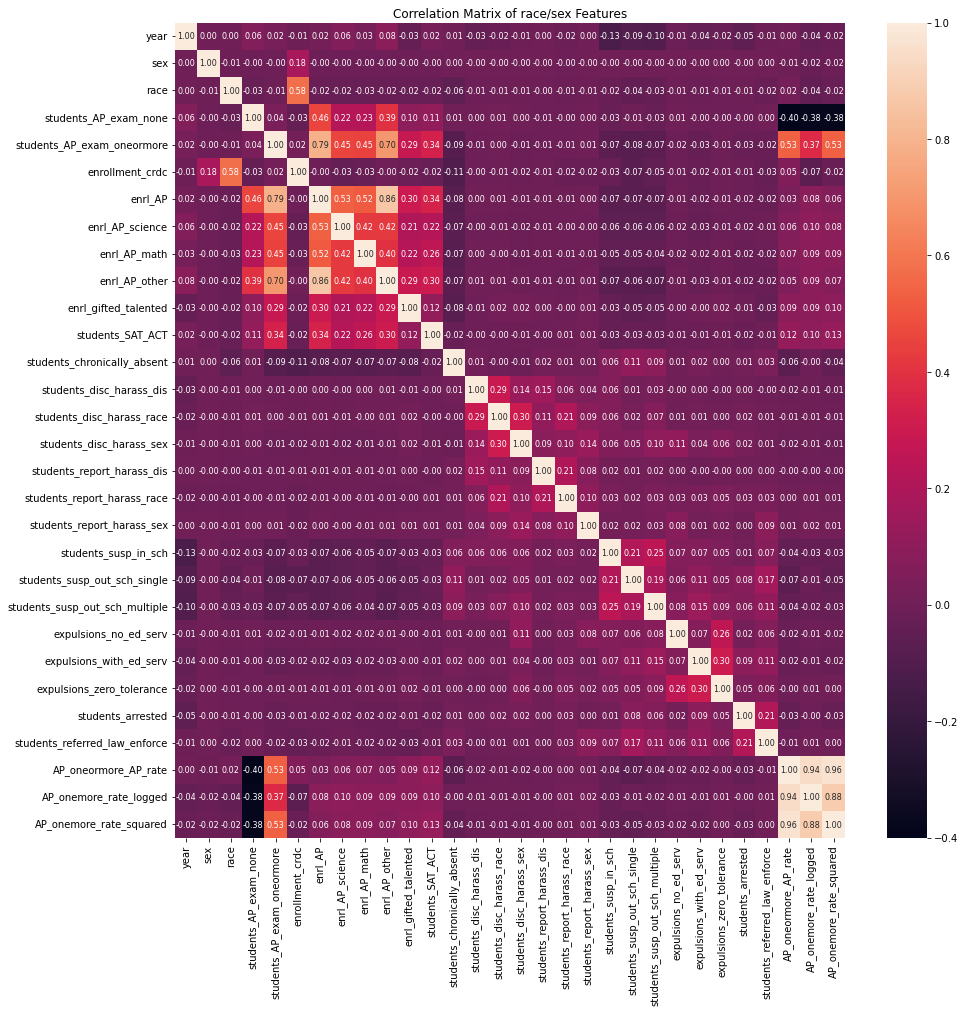

In [360]:
fig, ax = plt.subplots(figsize=(15,15)) 
correlation_mat = ap_rates_full.drop(['ncessch', 'leaid'], axis=1).corr()
sns.heatmap(correlation_mat, annot = True, ax=ax, annot_kws={"fontsize":8}, fmt='.2f')
plt.title("Correlation Matrix of race/sex Features") 
plt.show()

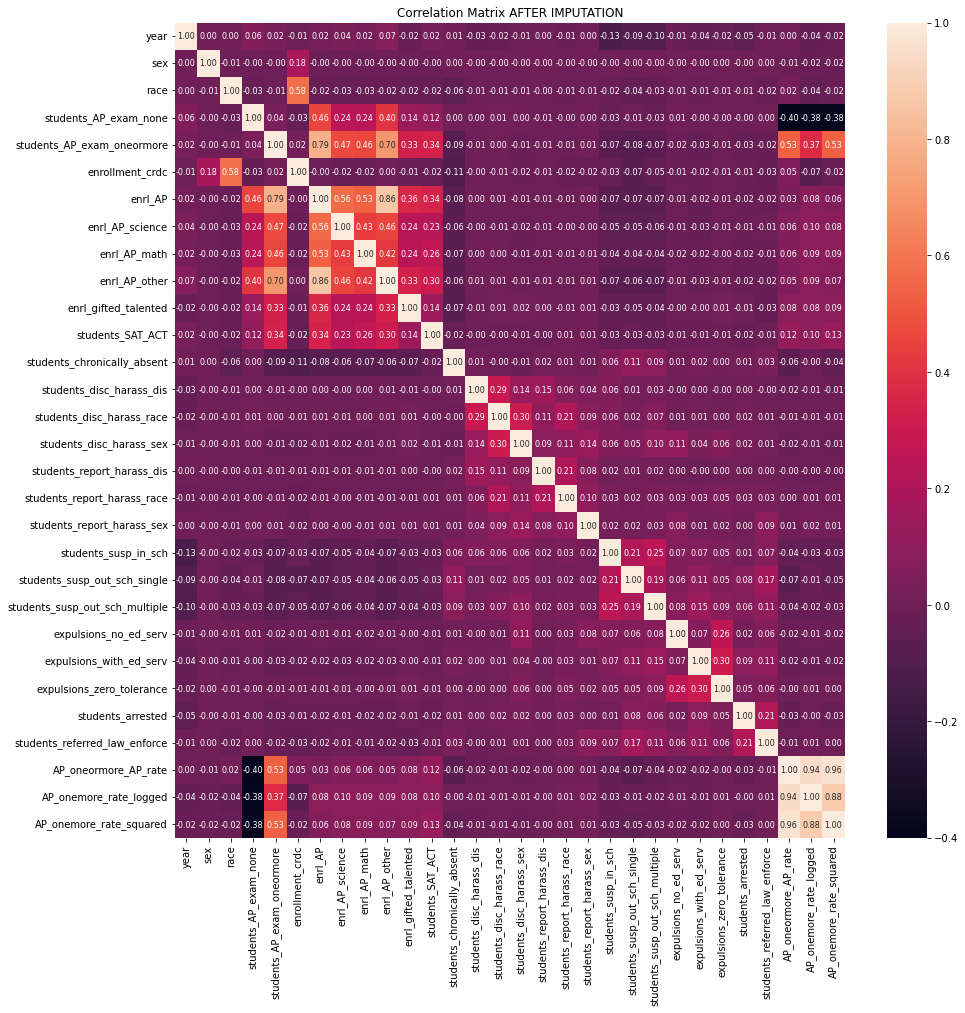

In [407]:
fig, ax = plt.subplots(figsize=(15,15)) 
correlation_mat = ap_rates_full.drop(['ncessch', 'leaid'], axis=1).corr()
sns.heatmap(correlation_mat, annot = True, ax=ax, annot_kws={"fontsize":8}, fmt='.2f')
plt.title("Correlation Matrix AFTER IMPUTATION") 
plt.show()

In [361]:
# First imputing enrl_AP with student_AP_exam_oneormore
ap_rates_full['AP_oneormore_quantiles'] = pd.qcut(ap_rates_full['students_AP_exam_oneormore'].rank(method='first'), 
                                                  100, labels=range(1, 101))
enrl_AP_impute = ap_rates_full.groupby('AP_oneormore_quantiles')['enrl_AP'].mean()

# ap_rates_full[ap_rates_full['enrl_AP'].isnull()][['ncessch', 'year', 'sex', 'race', 'enrl_AP', 
#                                                         'students_AP_exam_oneormore', 'AP_oneormore_quantiles']]


In [362]:
for i in range(0, ap_rates_full.shape[0]): 
    if (np.isnan(ap_rates_full['enrl_AP'][i])): 
        quantile = ap_rates_full['AP_oneormore_quantiles'][i]
        ap_rates_full['enrl_AP'][i] = enrl_other_impute[quantile-1]

In [364]:
### enrl_AP_other most corr with enrl_AP
ap_rates_full['enrl_AP_quantiles'] = pd.qcut(ap_rates_full['enrl_AP'].rank(method='first'), 
                                             100, labels=range(1, 101))
enrl_other_impute = ap_rates_full.groupby('enrl_AP_quantiles')['enrl_AP_other'].mean()

# ap_rates_full[ap_rates_full['enrl_AP_other'].isnull()][['ncessch', 'year', 'sex', 'race', 'enrl_AP', 
#                                                         'enrl_AP_other', 'enrl_AP_quantiles']]


In [365]:
for i in range(0, ap_rates_full.shape[0]): 
    if (np.isnan(ap_rates_full['enrl_AP_other'][i])): 
        quantile = ap_rates_full['enrl_AP_quantiles'][i]
        ap_rates_full['enrl_AP_other'][i] = enrl_other_impute[quantile-1]

In [366]:
# imputing SAT_ACT with enrl_AP 
def impute(dataframe, imputing_col, quantile_col): 
    dataframe['AP_quantiles'] = pd.qcut(dataframe[quantile_col].rank(method='first'), 
                                                  100, labels=range(1, 101))
    
    impute_quantiles = dataframe.groupby('AP_quantiles')[imputing_col].mean()
    
    for i in range(0, dataframe.shape[0]): 
        if (np.isnan(dataframe[imputing_col][i])): 
            quantile = dataframe['AP_quantiles'][i]
            dataframe[imputing_col][i] = impute_quantiles[quantile-1]
    
    dataframe = dataframe.drop(['AP_quantiles'], axis =1)
    
    return dataframe 

In [367]:
test = impute(ap_rates_full, 'students_SAT_ACT', 'enrl_AP')
test[test['students_SAT_ACT'].isnull()]

,ncessch,year,sex,race,leaid,students_AP_exam_none,students_AP_exam_oneormore,enrollment_crdc,enrl_AP,enrl_AP_science,enrl_AP_math,enrl_AP_other,enrl_gifted_talented,students_SAT_ACT,students_chronically_absent,students_disc_harass_dis,students_disc_harass_race,students_disc_harass_sex,students_report_harass_dis,students_report_harass_race,students_report_harass_sex,students_susp_in_sch,students_susp_out_sch_single,students_susp_out_sch_multiple,expulsions_no_ed_serv,expulsions_with_ed_serv,expulsions_zero_tolerance,students_arrested,students_referred_law_enforce,AP_oneormore_AP_rate,AP_onemore_rate_logged,AP_onemore_rate_squared,AP_oneormore_quantiles,enrl_AP_quantiles


In [368]:
test = impute(ap_rates_full, 'students_susp_in_sch', 'students_susp_out_sch_single')
test[test['students_susp_in_sch'].isnull()]

,ncessch,year,sex,race,leaid,students_AP_exam_none,students_AP_exam_oneormore,enrollment_crdc,enrl_AP,enrl_AP_science,enrl_AP_math,enrl_AP_other,enrl_gifted_talented,students_SAT_ACT,students_chronically_absent,students_disc_harass_dis,students_disc_harass_race,students_disc_harass_sex,students_report_harass_dis,students_report_harass_race,students_report_harass_sex,students_susp_in_sch,students_susp_out_sch_single,students_susp_out_sch_multiple,expulsions_no_ed_serv,expulsions_with_ed_serv,expulsions_zero_tolerance,students_arrested,students_referred_law_enforce,AP_oneormore_AP_rate,AP_onemore_rate_logged,AP_onemore_rate_squared,AP_oneormore_quantiles,enrl_AP_quantiles


In [369]:
test = impute(ap_rates_full, 'students_referred_law_enforce', 'students_susp_out_sch_single')
test[test['students_referred_law_enforce'].isnull()]

,ncessch,year,sex,race,leaid,students_AP_exam_none,students_AP_exam_oneormore,enrollment_crdc,enrl_AP,enrl_AP_science,enrl_AP_math,enrl_AP_other,enrl_gifted_talented,students_SAT_ACT,students_chronically_absent,students_disc_harass_dis,students_disc_harass_race,students_disc_harass_sex,students_report_harass_dis,students_report_harass_race,students_report_harass_sex,students_susp_in_sch,students_susp_out_sch_single,students_susp_out_sch_multiple,expulsions_no_ed_serv,expulsions_with_ed_serv,expulsions_zero_tolerance,students_arrested,students_referred_law_enforce,AP_oneormore_AP_rate,AP_onemore_rate_logged,AP_onemore_rate_squared,AP_oneormore_quantiles,enrl_AP_quantiles


In [370]:
test = impute(ap_rates_full, 'students_chronically_absent', 'students_susp_out_sch_single')
test[test['students_chronically_absent'].isnull()]

,ncessch,year,sex,race,leaid,students_AP_exam_none,students_AP_exam_oneormore,enrollment_crdc,enrl_AP,enrl_AP_science,enrl_AP_math,enrl_AP_other,enrl_gifted_talented,students_SAT_ACT,students_chronically_absent,students_disc_harass_dis,students_disc_harass_race,students_disc_harass_sex,students_report_harass_dis,students_report_harass_race,students_report_harass_sex,students_susp_in_sch,students_susp_out_sch_single,students_susp_out_sch_multiple,expulsions_no_ed_serv,expulsions_with_ed_serv,expulsions_zero_tolerance,students_arrested,students_referred_law_enforce,AP_oneormore_AP_rate,AP_onemore_rate_logged,AP_onemore_rate_squared,AP_oneormore_quantiles,enrl_AP_quantiles


In [371]:
# ap_rates_full[ap_rates_full['enrl_AP_science']==2]
ap_rates_full['enrl_AP_science'][73232] = np.nan

In [372]:
test = impute(ap_rates_full, 'enrl_AP_science', 'enrl_AP')
test[test['enrl_AP_science'].isnull()]

,ncessch,year,sex,race,leaid,students_AP_exam_none,students_AP_exam_oneormore,enrollment_crdc,enrl_AP,enrl_AP_science,enrl_AP_math,enrl_AP_other,enrl_gifted_talented,students_SAT_ACT,students_chronically_absent,students_disc_harass_dis,students_disc_harass_race,students_disc_harass_sex,students_report_harass_dis,students_report_harass_race,students_report_harass_sex,students_susp_in_sch,students_susp_out_sch_single,students_susp_out_sch_multiple,expulsions_no_ed_serv,expulsions_with_ed_serv,expulsions_zero_tolerance,students_arrested,students_referred_law_enforce,AP_oneormore_AP_rate,AP_onemore_rate_logged,AP_onemore_rate_squared,AP_oneormore_quantiles,enrl_AP_quantiles


In [374]:
test = impute(ap_rates_full, 'enrl_AP_math', 'enrl_AP')
test[test['enrl_AP_math'].isnull()]

,ncessch,year,sex,race,leaid,students_AP_exam_none,students_AP_exam_oneormore,enrollment_crdc,enrl_AP,enrl_AP_science,enrl_AP_math,enrl_AP_other,enrl_gifted_talented,students_SAT_ACT,students_chronically_absent,students_disc_harass_dis,students_disc_harass_race,students_disc_harass_sex,students_report_harass_dis,students_report_harass_race,students_report_harass_sex,students_susp_in_sch,students_susp_out_sch_single,students_susp_out_sch_multiple,expulsions_no_ed_serv,expulsions_with_ed_serv,expulsions_zero_tolerance,students_arrested,students_referred_law_enforce,AP_oneormore_AP_rate,AP_onemore_rate_logged,AP_onemore_rate_squared,AP_oneormore_quantiles,enrl_AP_quantiles


In [380]:
ap_rates_full[ap_rates_full['enrl_gifted_talented']>1]
# ap_rates_full['enrl_gifted_talented'][18538] = np.nan
# ap_rates_full['enrl_gifted_talented'][56433] = np.nan
# ap_rates_full['enrl_gifted_talented'][56442] = np.nan
# ap_rates_full['enrl_gifted_talented'][101789] = np.nan


,ncessch,year,sex,race,leaid,students_AP_exam_none,students_AP_exam_oneormore,enrollment_crdc,enrl_AP,enrl_AP_science,enrl_AP_math,enrl_AP_other,enrl_gifted_talented,students_SAT_ACT,students_chronically_absent,students_disc_harass_dis,students_disc_harass_race,students_disc_harass_sex,students_report_harass_dis,students_report_harass_race,students_report_harass_sex,students_susp_in_sch,students_susp_out_sch_single,students_susp_out_sch_multiple,expulsions_no_ed_serv,expulsions_with_ed_serv,expulsions_zero_tolerance,students_arrested,students_referred_law_enforce,AP_oneormore_AP_rate,AP_onemore_rate_logged,AP_onemore_rate_squared,AP_oneormore_quantiles,enrl_AP_quantiles,AP_quantiles


In [398]:
test = impute(ap_rates_full, 'enrl_gifted_talented', 'enrl_AP')
test[test['enrl_gifted_talented'].isnull()]

,ncessch,year,sex,race,leaid,students_AP_exam_none,students_AP_exam_oneormore,enrollment_crdc,enrl_AP,enrl_AP_science,enrl_AP_math,enrl_AP_other,enrl_gifted_talented,students_SAT_ACT,students_chronically_absent,students_disc_harass_dis,students_disc_harass_race,students_disc_harass_sex,students_report_harass_dis,students_report_harass_race,students_report_harass_sex,students_susp_in_sch,students_susp_out_sch_single,students_susp_out_sch_multiple,expulsions_no_ed_serv,expulsions_with_ed_serv,expulsions_zero_tolerance,students_arrested,students_referred_law_enforce,AP_oneormore_AP_rate,AP_onemore_rate_logged,AP_onemore_rate_squared,AP_oneormore_quantiles,enrl_AP_quantiles


In [389]:
ap_rates_full[ap_rates_full['expulsions_zero_tolerance']>1]

,ncessch,year,sex,race,leaid,students_AP_exam_none,students_AP_exam_oneormore,enrollment_crdc,enrl_AP,enrl_AP_science,enrl_AP_math,enrl_AP_other,enrl_gifted_talented,students_SAT_ACT,students_chronically_absent,students_disc_harass_dis,students_disc_harass_race,students_disc_harass_sex,students_report_harass_dis,students_report_harass_race,students_report_harass_sex,students_susp_in_sch,students_susp_out_sch_single,students_susp_out_sch_multiple,expulsions_no_ed_serv,expulsions_with_ed_serv,expulsions_zero_tolerance,students_arrested,students_referred_law_enforce,AP_oneormore_AP_rate,AP_onemore_rate_logged,AP_onemore_rate_squared,AP_oneormore_quantiles,enrl_AP_quantiles,AP_quantiles


In [399]:
test = impute(ap_rates_full, 'expulsions_zero_tolerance', 'expulsions_with_ed_serv')
test[test['expulsions_zero_tolerance'].isnull()]

,ncessch,year,sex,race,leaid,students_AP_exam_none,students_AP_exam_oneormore,enrollment_crdc,enrl_AP,enrl_AP_science,enrl_AP_math,enrl_AP_other,enrl_gifted_talented,students_SAT_ACT,students_chronically_absent,students_disc_harass_dis,students_disc_harass_race,students_disc_harass_sex,students_report_harass_dis,students_report_harass_race,students_report_harass_sex,students_susp_in_sch,students_susp_out_sch_single,students_susp_out_sch_multiple,expulsions_no_ed_serv,expulsions_with_ed_serv,expulsions_zero_tolerance,students_arrested,students_referred_law_enforce,AP_oneormore_AP_rate,AP_onemore_rate_logged,AP_onemore_rate_squared,AP_oneormore_quantiles,enrl_AP_quantiles


In [384]:
ap_rates_full[ap_rates_full['enrl_gifted_talented'].isnull()]

,ncessch,year,sex,race,leaid,students_AP_exam_none,students_AP_exam_oneormore,enrollment_crdc,enrl_AP,enrl_AP_science,enrl_AP_math,enrl_AP_other,enrl_gifted_talented,students_SAT_ACT,students_chronically_absent,students_disc_harass_dis,students_disc_harass_race,students_disc_harass_sex,students_report_harass_dis,students_report_harass_race,students_report_harass_sex,students_susp_in_sch,students_susp_out_sch_single,students_susp_out_sch_multiple,expulsions_no_ed_serv,expulsions_with_ed_serv,expulsions_zero_tolerance,students_arrested,students_referred_law_enforce,AP_oneormore_AP_rate,AP_onemore_rate_logged,AP_onemore_rate_squared,AP_oneormore_quantiles,enrl_AP_quantiles,AP_quantiles


In [401]:
test = impute(ap_rates_full, 'students_arrested', 'students_referred_law_enforce')
test = impute(ap_rates_full, 'students_disc_harass_sex', 'expulsions_no_ed_serv')
test = impute(ap_rates_full, 'students_report_harass_sex', 'students_referred_law_enforce')

In [403]:
test = impute(ap_rates_full, 'students_disc_harass_race', 'students_disc_harass_sex')
test = impute(ap_rates_full, 'students_disc_harass_dis', 'students_disc_harass_race')

test = impute(ap_rates_full, 'students_report_harass_race', 'students_disc_harass_race')
test = impute(ap_rates_full, 'students_report_harass_dis', 'students_report_harass_race')

test = impute(ap_rates_full, 'students_AP_exam_none', 'enrl_AP')

In [404]:
ap_rates_full.isna().sum()

ncessch                               0
year                                  0
sex                                   0
race                                  0
leaid                                 0
students_AP_exam_none                 0
students_AP_exam_oneormore            0
enrollment_crdc                       0
enrl_AP                               0
enrl_AP_science                       0
enrl_AP_math                          0
enrl_AP_other                         0
enrl_gifted_talented                  0
students_SAT_ACT                      0
students_chronically_absent           0
students_disc_harass_dis              0
students_disc_harass_race             0
students_disc_harass_sex              0
students_report_harass_dis            0
students_report_harass_race           0
students_report_harass_sex            0
students_susp_in_sch                  0
students_susp_out_sch_single          0
students_susp_out_sch_multiple        0
expulsions_no_ed_serv                 0


In [406]:
# ap_rates_full.to_csv('ap_rates_imputed.csv', index=False)

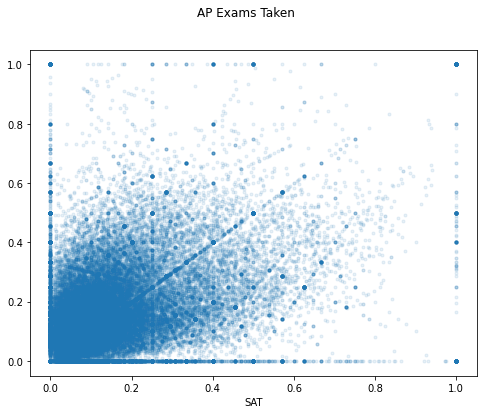

In [381]:
fig,ax = plt.subplots(figsize=(8, 6))
fig.suptitle("AP Exams Taken")

ax.scatter(ap_rates_full['enrl_gifted_talented'], ap_rates_full['students_AP_exam_oneormore'], alpha=0.1, marker='.')
ax.set_xlabel("SAT");

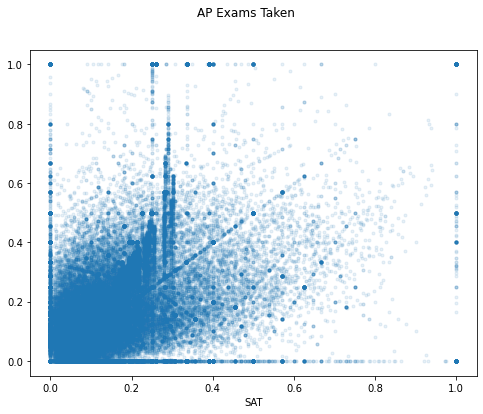

In [385]:
fig,ax = plt.subplots(figsize=(8, 6))
fig.suptitle("AP Exams Taken")

ax.scatter(test['enrl_gifted_talented'], test['students_AP_exam_oneormore'], alpha=0.1, marker='.')
ax.set_xlabel("SAT");